# CV TA-2
Name : Dnyanesh Radke

Section: B

Roll No.: 36

 1.Implement the SIFT algorithm to detect and match key points between two images.

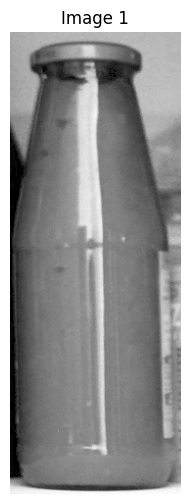

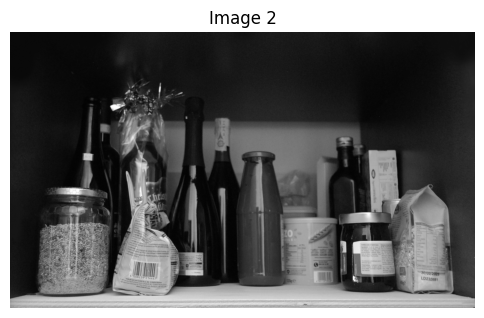

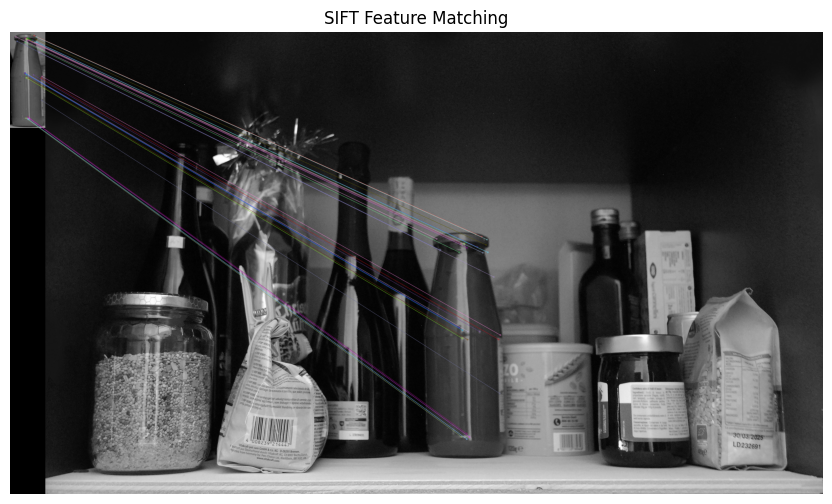

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread('/content/Screenshot 2025-04-08 225607.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/cv.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,6))
plt.imshow(img1, cmap='gray')
plt.title("Image 1")
plt.axis('off')
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(img2, cmap='gray')
plt.title("Image 2")
plt.axis('off')
plt.show()

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append([m])

matched_img = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=2)

plt.figure(figsize=(15, 6))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title("SIFT Feature Matching")
plt.axis('off')
plt.show()


SIFT (Scale-Invariant Feature Transform):
SIFT was successfully applied to detect and describe keypoints in two different images. The algorithm demonstrated its robustness by accurately identifying matching features despite changes in scale, rotation, and slight perspective differences. It effectively extracted invariant features that are useful for object recognition tasks.

3. Use RANSAC to remove outlier key point matches and fit a transformation model between two images.

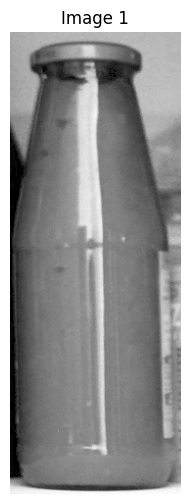

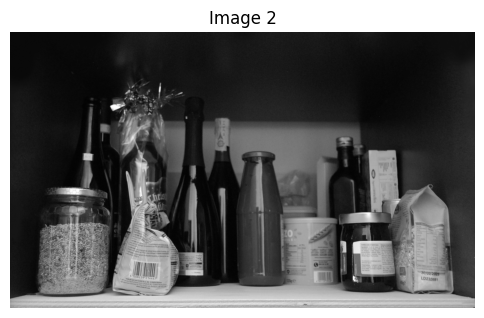

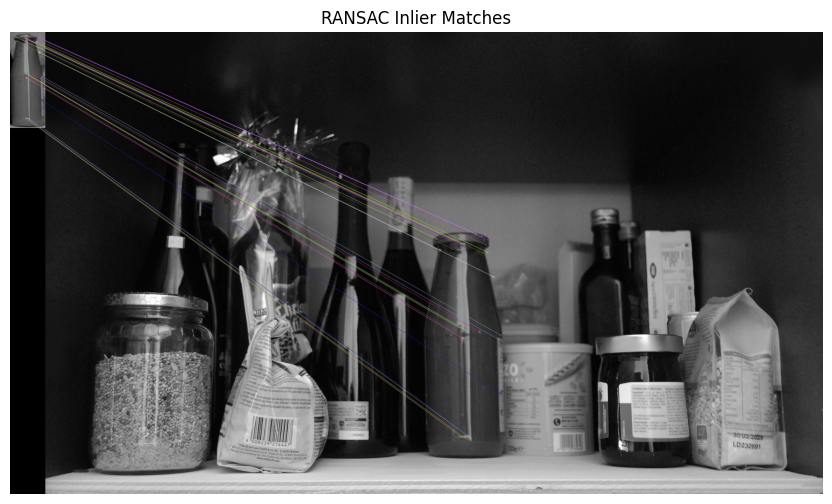

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread('/content/Screenshot 2025-04-08 225607.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/cv.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,6))
plt.imshow(img1, cmap='gray')
plt.title("Image 1")
plt.axis('off')
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(img2, cmap='gray')
plt.title("Image 2")
plt.axis('off')
plt.show()

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
matchesMask = mask.ravel().tolist()

inlier_matches = [good_matches[i] for i in range(len(good_matches)) if matchesMask[i]]
ransac_result = cv2.drawMatches(img1, kp1, img2, kp2, inlier_matches, None, flags=2)

plt.figure(figsize=(15, 6))
plt.imshow(cv2.cvtColor(ransac_result, cv2.COLOR_BGR2RGB))
plt.title("RANSAC Inlier Matches")
plt.axis('off')
plt.show()


RANSAC (Random Sample Consensus):
To improve the reliability of feature matching, RANSAC was used to eliminate outliers from the initial SIFT matches. By estimating a homography between the two sets of matched points, RANSAC preserved only the inlier matches that agreed with the transformation model. This step significantly enhanced match accuracy and robustness, especially in the presence of noise or false matches.

4. Implement the Harris corner detector to find and visualize corners in a grayscale image.

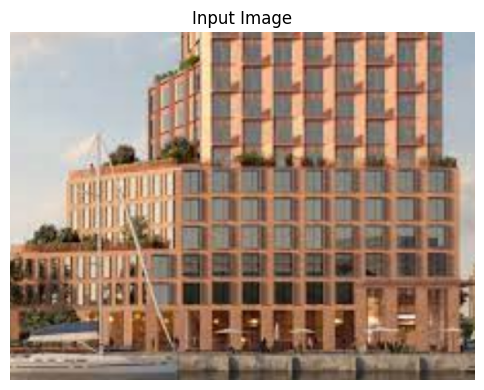

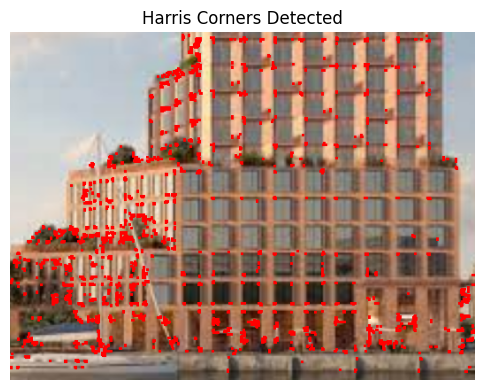

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/Screenshot 2025-04-08 230244.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Input Image")
plt.axis('off')
plt.show()

gray = np.float32(gray)
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

dst = cv2.dilate(dst, None)

img_with_corners = img.copy()
img_with_corners[dst > 0.01 * dst.max()] = [0, 0, 255]

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
plt.title("Harris Corners Detected")
plt.axis('off')
plt.show()


Harris Corner Detection:
Harris Corner Detection was implemented to identify strong corner features in grayscale images. The algorithm detected prominent corners based on gradient changes and worked particularly well on structured images like boxes, buildings, and checkerboard patterns. This technique provides a foundational understanding of corner-based feature extraction.

# Conclusion :

All three algorithms are powerful tools in computer vision for different stages of feature-based image analysis.

SIFT + RANSAC together form a highly reliable pipeline for object recognition and image alignment.

Harris provides a simpler, yet effective, method for detecting corners which can be used in tracking and motion analysis tasks.